<a href="https://colab.research.google.com/github/RubenCarty/Master-Artificial-Intelligence-UNIR/blob/main/ML%20Tecnics%20%20/Solucion_Act3_Tecnicas_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Técnicas de Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

### Nombres de los estudiantes:
- Ruben Quispe Llaccrtarimay
- Fabiola Arancibia Hernández
- Juan Sebastíán Vargas Arévalo
- Jorge Luis Chicoma Gamarra

# Caso Grupal: Clasificación de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en práctica la aplicación de un proceso completo de machine learning a la clasificación de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

## EDA

# Parte 1: Análisis Exploratorio de Datos (EDA)

In [1]:
# coloca tu código y respuestas del punto 1 en esta sección

#1.  Carga del dataset:

In [2]:
import pandas as pd

# URL del archivo CSV
url = "https://github.com/almudenaris/TAA/raw/main/out.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(url)


# 2. Inspección inicial del dataset:

In [3]:
# Mostrar las primeras filas del DataFrame y los nombres de las columnas
print(df.head()) # Imprime los 5 primeros filas del dataset
print(df.columns)
print(df.info())
print(df.describe())


   A   B   C  D  E                                         comentario  label  \
0  2  64  30  0  2  pandemia,originado,covid,cierto,incidencia,aba...    0.0   
1  4  70  21  0  0  ser,mes,larga,espera,llegar,momento,siempre,pr...    0.0   
2  4  88  50  0  0  cartagena,san,sebastiar,fuengirola,irun,orense...    0.0   
3  3  38  21  0  0  pleno,dia,verano,calor,plan,mas,apetecibl,disf...    0.0   
4  0  59  17  0  0  pasado,junio,celebro,dia,luchar,frente,leishma...    0.0   

        A_t       B_t        C_t  ...    Valor_1    Valor_2   Valor_3  \
0  1.851102  2.759647   7.145831  ...   5.108388  13.227660 -0.771127   
1  3.990202  3.054765   4.877255  ...  12.189130  19.461233 -1.662227   
2  3.990202  3.940120  12.187108  ...  15.721875  48.629021 -1.662227   
3  2.920652  1.480801   4.877255  ...   4.324903  14.244765 -1.216677   
4 -0.287998  2.513715   3.869000  ...  -0.723945  -1.114264  0.119973   

    Valor_4    Valor_5   Valor_6   Valor_7   Valor_8   Valor_9  Valor_10  
0  0.

- Descripción: Esta sección proporciona estadísticas descriptivas de todas las columnas numéricas en el DataFrame. Incluye la cuenta (count), media (mean), desviación estándar (std), valor mínimo (min), percentiles (25%, 50%, 75%) y valor máximo (max).
- Propósito: Estas estadísticas permiten comprender la distribución de los datos en cada columna, lo cual es útil para identificar valores atípicos, tendencias y rangos de datos.

# 3. Distribución de clases:

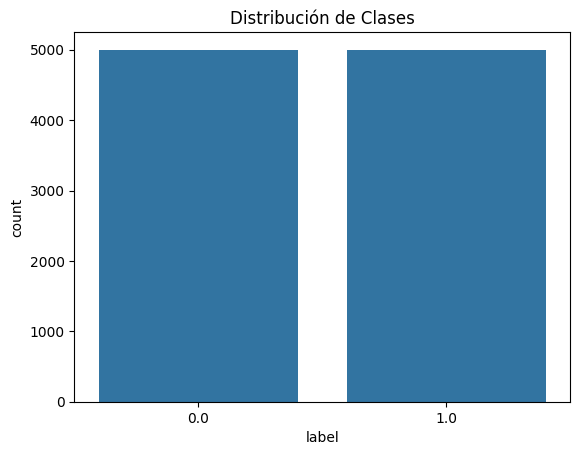

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de clases
sns.countplot(x='label', data=df)
plt.title('Distribución de Clases')
plt.show()


# 4. Análisis de texto:

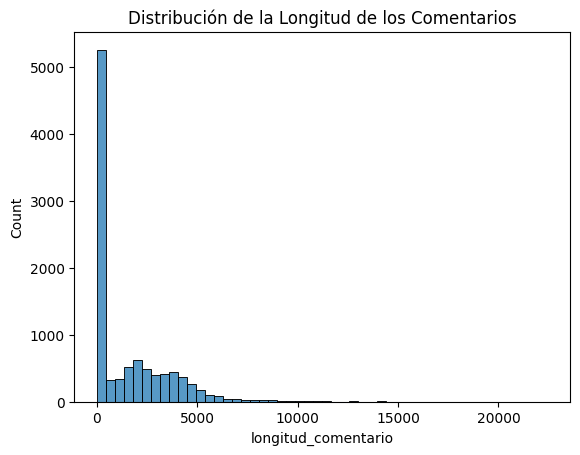

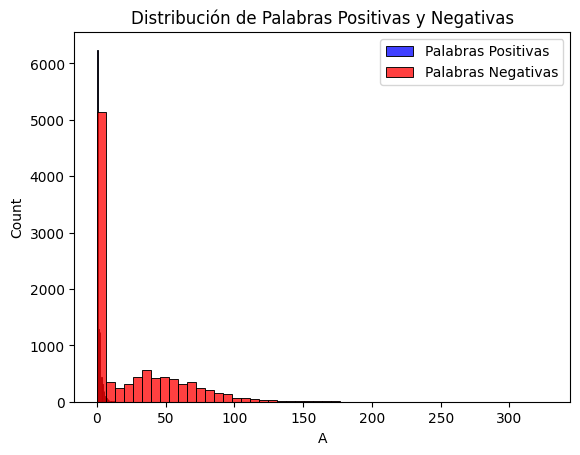

In [5]:
# Longitud de los comentarios
df['longitud_comentario'] = df['comentario'].apply(len)
sns.histplot(df['longitud_comentario'], bins=50)
plt.title('Distribución de la Longitud de los Comentarios')
plt.show()

# Conteo de palabras positivas y negativas
sns.histplot(df['A'], bins=50, color='blue', label='Palabras Positivas')
sns.histplot(df['B'], bins=50, color='red', label='Palabras Negativas')
plt.legend()
plt.title('Distribución de Palabras Positivas y Negativas')
plt.show()


- **Distribución de Palabras Positivas y Negativas:**
- **Descripción**: Este gráfico muestra la distribución de las palabras positivas (A) y las palabras negativas (B) en el dataset.
- **Análisis:** Las palabras positivas están representadas en color azul y las palabras negativas en color rojo. Esto permite comparar visualmente la frecuencia de palabras positivas y negativas en los comentarios.
- **Utilidad:** Esta comparación es útil para entender el balance del dataset. En un problema de clasificación de odio, es importante saber si hay un equilibrio entre palabras positivas y negativas, ya que un desbalance podría afectar el rendimiento de los modelos de clasificación.

Estos gráficos son una parte importante del análisis exploratorio de datos, ya que proporcionan información visual sobre las características y distribución de los datos. Esta información puede guiar el preprocesamiento y la selección de características para los modelos de machine learning. En este caso, los resultados muestran que la mayoría de los comentarios son cortos y que existe una variabilidad considerable en la cantidad de palabras positivas y negativas.

# 5. Análisis de la distribución de las variables


Histograma con variables sin estandarizar


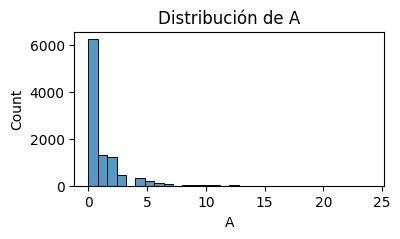

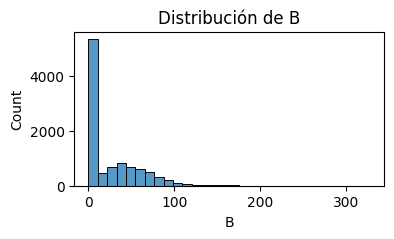

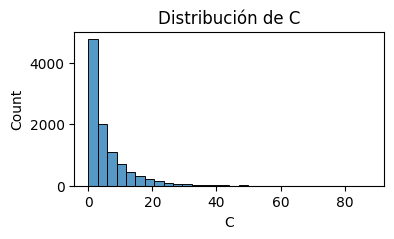

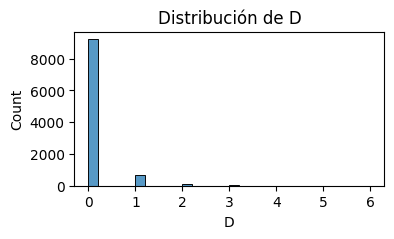

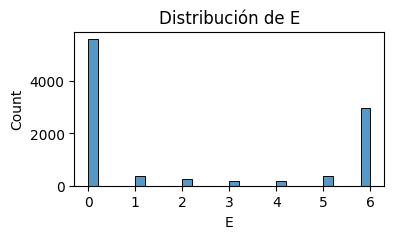

-----------------------------------------------------
 
Histograma con variables  estandarizadas (transformadas)


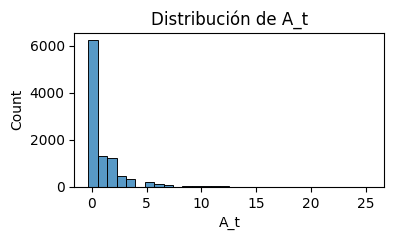

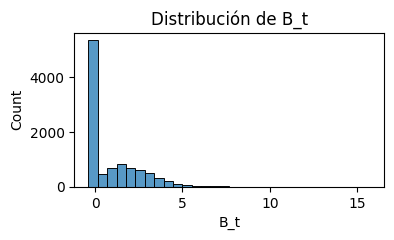

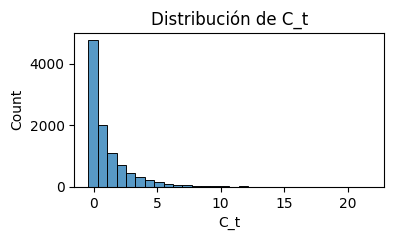

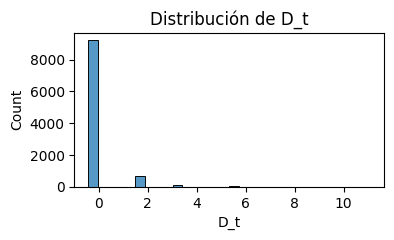

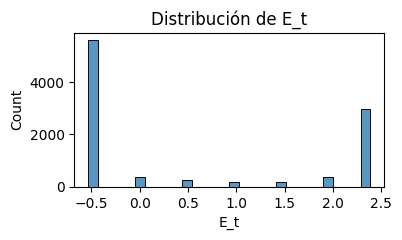

In [6]:
# Variable label= 0/sin odio   -  1/con odio
# distribucion de las variables // # Histograma para cada variable
print('Histograma con variables sin estandarizar')
variables = ['A', 'B', 'C', 'D', 'E']
for var in variables:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[var], bins=30)
    plt.title(f'Distribución de {var}')
    plt.show()
print('-----------------------------------------------------')
print(' ')

# Histograma para cada variable estandarizada
print('Histograma con variables  estandarizadas (transformadas)')
variables = ['A_t', 'B_t', 'C_t', 'D_t', 'E_t']
for var in variables:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[var], bins=30)
    plt.title(f'Distribución de {var}')
    plt.show()


*   Las variables A, B, C, D, A_t, B_t, C_t, y D_t muestran un sesgo significativo a la derecha. Esto puede afectar los modelos de regresión, que generalmente asumen una distribución normal
*   Las variables estandarizadas (A_t, B_t, C_t, D_t, E_t) reflejan las mismas distribuciones que las variables originales, pero con escalas ajustadas. Esto es útil para mejorar el rendimiento de los modelos de machine learning
*   La variable E y su versión estandarizada E_t muestran una mayor distribución en dos grupos. Esto sugiere la presencia de dos grupos distintos en los datos, lo cual podría ser relevante en el modelo de regresión logística porque pueden influir en el comportamiento de la variable objetivo de manera diferente

# 5. Correlación de las variables estandarizadas (_t)


<ipython-input-7-5505b23910f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')
<ipython-input-7-5505b23910f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


Vefificando cantidades después de la eliminación
A_t      10000
B_t      10000
C_t      10000
D_t      10000
E_t      10000
label    10000
dtype: int64
-------------------------------------------------


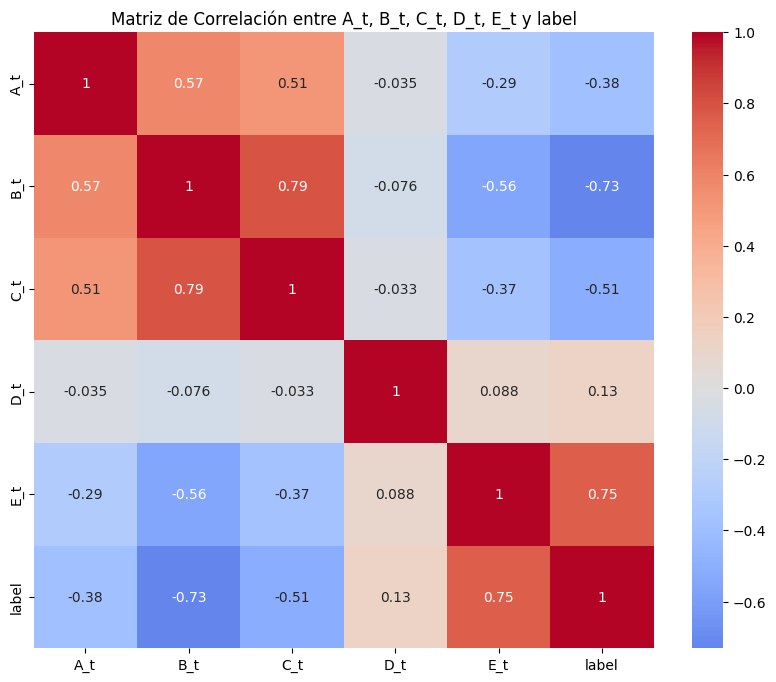

Correlación con la variable objetivo 'label':

label: 1.0000
E_t: 0.7550
D_t: 0.1302
A_t: -0.3801
C_t: -0.5097
B_t: -0.7312



In [7]:
# Seleccionar las columnas de interés del dataset, según explicación en el foro las _t son las estandarizadas o transformadas
selected_cols = ['A_t', 'B_t', 'C_t', 'D_t', 'E_t', 'label']
df_selected = df[selected_cols]

# Convertir a numérico si es necesario (ya debería estar hecho, pero por si acaso)
for col in selected_cols:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

# Eliminar filas con valores no numéricos, para que no me siga dando el error de tipos de datos al hacer la matriz
df_selected.dropna(inplace=True)
print('Vefificando cantidades después de la eliminación')
print( df_selected.count())
print('-------------------------------------------------')
# Calcular la matriz de correlación
corr_matrix = df_selected.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre A_t, B_t, C_t, D_t, E_t y label')
plt.show()


# Para facilitar la interpretación, se vuelve a calcular la correlación con la variable objetivo 'label'
# para generar los datos en formato de reporte y analizar
correlations = df_selected.corr()['label'].sort_values(ascending=False)
# Generar el reporte
report = f"Correlación con la variable objetivo 'label':\n\n"
for index, value in correlations.items():
    report += f"{index}: {value:.4f}\n"

print(report)

Existe una fuerte correlación positiva entre E_t (la variable estandarizada E) y la variable objetivo label. Esto sugiere que a medida que los valores de E_t aumentan, es más probable que el label sea 1 (odio). Esto indica que la característica E_t es un buen predictor para identificar mensajes de odio. Aún así, vemos que casi todas las variables están correlacionadas, inclusive aquellas que tienen valor negativo indicando una correlación inversa como A_t, C_t y B_t.

## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

# Parte 2: Selección y Entrenamiento de los Modelos

# 1. División del dataset:

In [8]:
# coloca tu código y respuestas del punto 2 en esta sección

In [9]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['comentario'], df['label'], test_size=0.2, random_state=42)

num_data = df.select_dtypes(include=["int64", "float64"])

corr = num_data.corr()
corr["label"].sort_values(ascending=False)

X = corr["label"].sort_values(ascending=False).index[1:6]
y = df["label"]

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(num_data[X], y, test_size=0.33, random_state=42)


# 2. Vectorización TF-IDF:

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# 3. Entrenamiento de modelos:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=3)
}

for model_name, model in models.items():
    if model_name == "KNN Classifier":
      model.fit(X_train_knn, y_train_knn)
    else:
      model.fit(X_train_tfidf, y_train)


## 3.1 Modelo Regresión logística
(Fabiola)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definir las variables predictoras y la variable objetivo
# Incluyendo E_t y otras variables predictoras
variables_predictoras = ['A', 'B', 'C', 'D', 'E', 'A_t', 'B_t', 'C_t', 'D_t', 'E_t'] + [f'Valor_{i}' for i in range(1, 11)]
X = df[variables_predictoras]
y = df['label']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% evaluación)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que escala los datos y luego aplica la regresión logística con hiperparámetros personalizados
pipeline = Pipeline([
    ('scaler', StandardScaler()),
   # ('logistic', LogisticRegression(max_iter=1000, solver='saga', C=0.1, penalty='l1')) #Esta configuración de hiperparámetros aumenta el riesgo de overfitting
       ('logistic', LogisticRegression(max_iter=1000, solver='liblinear', C=0.001, penalty='l2'))
])


# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)


In [13]:
# Evaluación individual del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9525
Confusion Matrix:
[[934  78]
 [ 17 971]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1012
         1.0       0.93      0.98      0.95       988

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



## EVALUACIÓN DE LOS MODELOS Y COMPARATIVA

# Parte 3: Evaluación de los Modelos y Comparativa

# 1. Evaluación de modelos

In [14]:
# coloca tu código y respuestas del punto 3 en esta sección

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for model_name, model in models.items():
    if model_name == "KNN Classifier":
      y_pred = model.predict(X_test_knn)
      print(f"Resultados para {model_name}:")
      print(classification_report(y_test_knn, y_pred))
      print("Matriz de Confusión:")
      print(confusion_matrix(y_test_knn, y_pred))
      print("Exactitud:", accuracy_score(y_test_knn, y_pred))
      print("\n")
    else:
      y_pred = model.predict(X_test_tfidf)
      print(f"Resultados para {model_name}:")
      print(classification_report(y_test, y_pred))
      print("Matriz de Confusión:")
      print(confusion_matrix(y_test, y_pred))
      print("Exactitud:", accuracy_score(y_test, y_pred))
      print("\n")


Resultados para Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1012
         1.0       0.97      1.00      0.98       988

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Matriz de Confusión:
[[984  28]
 [  3 985]]
Exactitud: 0.9845


Resultados para Decision Tree:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1012
         1.0       0.96      0.97      0.96       988

    accuracy                           0.96      2000
   macro avg       0.96      0.97      0.96      2000
weighted avg       0.97      0.96      0.97      2000

Matriz de Confusión:
[[972  40]
 [ 30 958]]
Exactitud: 0.965


Resultados para Random Forest:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1012
         1.

- SVM: Sobresale con una exactitud de 98.65% y muy pocas equivocaciones.
- Logistic Regression y Random Forest: Muy buenos, con exactitud cerca del 98% y bajo número de errores.
- Decision Tree y Naive Bayes: Ligeramente inferiores pero aún así muy buenos con exactitud alrededor del 97%.
- KNN Classifier: Rendimiento muy bueno con exactitud del 97.88%.
- En general, todos los modelos muestran un rendimiento robusto, pero el SVM y la regresión logística parecen ser los más efectivos para este conjunto de datos.

# Visualizar ROC Curves

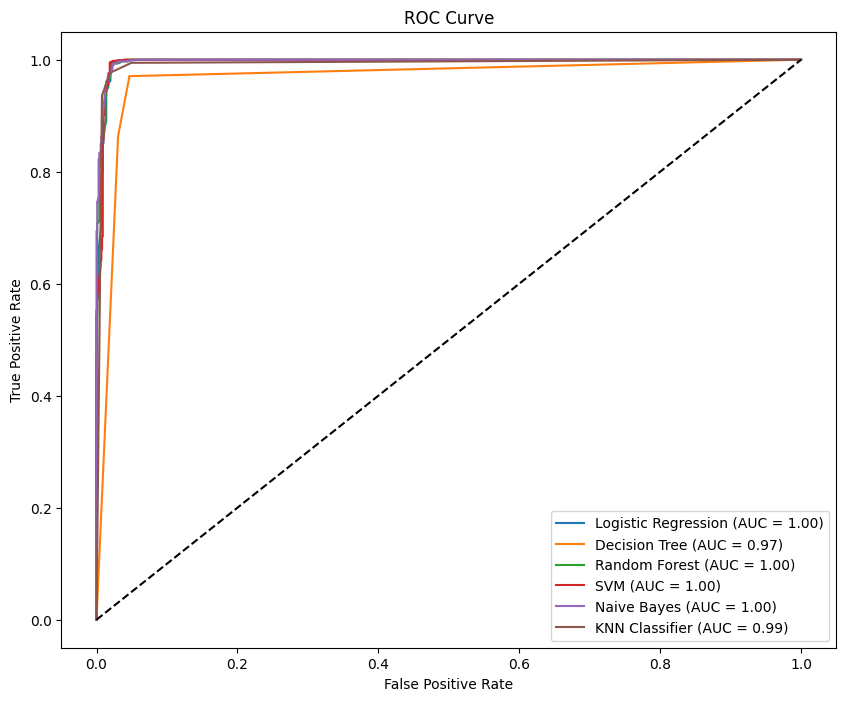

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Lista de modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),  # SVM con probabilidad para ROC
    "Naive Bayes": MultinomialNB(),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=3)
}

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['comentario'], df['label'], test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

plt.figure(figsize=(10, 8))

# Entrenar y predecir con cada modelo, luego calcular ROC curve y AUC
for model_name, model in models.items():

    if model_name == "KNN Classifier":
      model.fit(X_train_knn, y_train_knn)
      y_pred_prob = model.predict_proba(X_test_knn)[:, 1]
      fpr, tpr, _ = roc_curve(y_test_knn, y_pred_prob)
      auc = roc_auc_score(y_test_knn, y_pred_prob)
    else:
      model.fit(X_train_tfidf, y_train)
      y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]
      fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
      auc = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Configuraciones de la gráfica
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




Una curva ROC es una representación visual del rendimiento de un modelo a diferentes umbrales de clasificación. Grafica la Tasa de Positivos Verdaderos (TPR) en el eje y contra la Tasa de Falsos Positivos (FPR) en el eje x.

- Tasa de Positivos Verdaderos (TPR): Es la proporción de casos positivos que fueron identificados correctamente por el modelo. En otras palabras, es la recuperación del modelo.
- Tasa de Falsos Positivos (FPR): Es la proporción de casos negativos que fueron clasificados incorrectamente como positivos por el modelo.
Una curva ROC ideal sería una línea que comienza en la esquina superior izquierda (0, 1) y baja en línea recta hasta la esquina inferior derecha (1, 0). Esto indicaría que el modelo separa perfectamente los casos positivos y negativos.



**Recomendaciones:**

Selección del Modelo: Si bien todos los modelos parecen funcionar bien, es posible que desee elegir el modelo con el AUC más alto o el que tenga otras características deseables, como la simplicidad o la interpretabilidad.
Análisis Adicional: Es posible que desee realizar un análisis adicional para comprender mejor el rendimiento de cada modelo, como analizar la matriz de confusión o las curvas de precisión-recuerdo.
Consideraciones del Negocio: Es importante considerar las necesidades del negocio y los costos asociados con cada modelo al tomar una decisión final.



# PREGUNTAS DE LA ACTIVIDAD

## 1. ¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos y busca que sea adecuado para la tarea que se pretende resolver y para el dataset facilitado. Explica con detalle los análisis que serían necesarios realizar sobre los datos.

**¿Qué tarea de aprendizaje automático se pretende resolver?**
El ejercicio busca implementar un clasificador binario de mensajes para identificar cuales tienen odio y cuales no, esto implica etiquetar comentarios como mensajes de odio (clase 1) o no odio (clase 0)

**¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos?**
Se requirió realizar el EDA para identificar las posibles variables predictoras que den el mejor resultado, asi como comprobar la distribución y estadística del dataset
- **Distribución de Clases**: Evaluar la cantidad de ejemplos en cada clase (odio vs. no odio).
- **Limpieza de Datos**: Asegurarse de que no haya valores nulos o duplicados, y preprocesar el texto para eliminar signos de puntuación, convertir a minúsculas, etc.
- **Análisis de Características:** Examinar características como la longitud del comentario, el conteo de palabras positivas y negativas, etc., para comprender mejor el contenido del texto.

**Realiza un análisis exploratorio de datos y busca que sea adecuado para la tarea que se pretende resolver y para el dataset facilitado. Explica con detalle los análisis que serían necesarios realizar sobre los datos.**

Para el análisis exploratorio de datos se realizaron las siguientes actividades que constan en el notebook:

°   Se realizó una inspección inicial de los datos, cantidades, presentación de los datos, tipos de variables, cantidad y nombres de las columnas del dataset, así como el análisis estadístico de los datos.

°   Se analiza la distribución de los datos con relación a la variable objetivo 'label' lo cual mostró un resultado completamente equilibrado entre los valores 0 (sin odio) y los valores 1 (con odio).

°   Se realiza un análisis del texto en relación a la longitud de los mensajes, donde se muestra que la mayoría tienen una longitud entre 0 y 500 caracteres, esto indica que la gran mayoría de mensajes son bastante cortos.  

°   Para analizar la distribución de las variables A, B, C, D, E y sus respectivas variables estandarizadas A_t hasta E_t se utilizó un histograma para cada una de ellas, de dichos histogramas se concluye lo siguiente:
-    Las variables A, B, C, D, A_t, B_t, C_t, y D_t muestran un sesgo significativo a la derecha. Esto puede afectar los modelos de regresión, que generalmente asumen una distribución normal.
-    Las variables estandarizadas (A_t, B_t, C_t, D_t, E_t) reflejan las mismas distribuciones que las variables originales, pero con escalas ajustadas. Esto es útil para mejorar el rendimiento de los modelos de machine learning
-    La variable E y su versión estandarizada E_t muestran una mayor distribución en dos grupos. Esto sugiere la presencia de dos grupos distintos en los datos, lo cual podría ser relevante para los diferentes modelos que se analizaran en el ejercicio actual.

°   Por último se realiza la matriz de correlación de la cual se concluye que existe una fuerte correlación positiva entre E_t (la variable estandarizada E) y la variable objetivo label. Esto sugiere que a medida que los valores de E_t aumentan, es más probable que el label sea 1 (odio). Esto indica que la característica E_t es un buen predictor para identificar mensajes de odio. Aun así, vemos que casi todas las variables están correlacionadas, inclusive aquellas que tienen valor negativo indicando una correlación inversa como A_t, C_t y B_t.



## 2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa los modelos necesarios. Realiza los entrenamientos necesarios para cada uno de ellos (al menos se deben hacer entrenamientos con dos algoritmos diferentes). Explica por qué son convenientes los algoritmos elegidos.

En base a la tarea de clasificación de mensajes de odio y las características del dataset, se han seleccionado los siguientes algoritmos:

- **Logistic Regression:** Este algoritmo es una buena opción para problemas de clasificación binaria como este, ya que es simple de implementar, interpretable y eficiente.
- **Decision Tree:** Interpretable y capaz de manejar relaciones no lineales.
- **Random Forest:** Mejor rendimiento y reducción del sobreajuste.
-**SVM**: Eficaz en espacios de alta dimensionalidad.
-**Naive Bayes:** Rápido y efectivo con datos textuales.
-**KNN**: Almacena los ejemplos de entrenamiento y hace predicciones sobre nuevos datos basándose en la similitud con ejemplos previamente vistos.

Nota: Revisar el codigo lineas arriba


## 3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.

### Métricas de evaluación:

- **Precisión:** Mide la proporción de mensajes correctamente clasificados (tanto mensajes con odio como sin odio).
- **Recall:** Mide la proporción de mensajes con odio que fueron correctamente identificados como tales.
- **F1-score**: Es una medida que combina la precisión y el recall, proporcionando una visión general del rendimiento del modelo en ambas clases.
- **Curva ROC y AUC**: La curva ROC (Receiver Operating Characteristic) muestra la capacidad del modelo para discriminar entre las clases a diferentes umbrales de decisión. El AUC (Área Bajo la Curva) resume el rendimiento general del modelo en la clasificación binaria.

### Justificación de las métricas:

- La precisión es importante para garantizar que el modelo no clasifique erróneamente los mensajes, lo que podría tener consecuencias negativas.
- El recall es crucial para identificar correctamente los mensajes con odio, evitando que se propaguen o causen daño.
- El F1-score proporciona un equilibrio entre la precisión y el recall, ofreciendo una visión general del rendimiento del modelo en ambas clases.
- La curva ROC y el AUC permiten evaluar la capacidad del modelo para discriminar entre las clases a diferentes niveles de sensibilidad y especificidad.

### Evaluación del modelo

**Análisis de los Resultados:**

En la curva ROC, todos los modelos tienen un AUC (Área Bajo la Curva) cercano a 1, lo cual es un resultado muy bueno. Un AUC de 1 corresponde a un clasificador perfecto.

- Regresión Logística: Alcanzó un AUC perfecto de 1.00.
- Árbol de Decisión: Alcanzó un AUC de 0.97, lo cual es muy bueno.
- Bosque Aleatorio: Alcanzó un AUC perfecto de 1.00.
- SVM: Alcanzó un AUC perfecto de 1.00.
- Naive Bayes: Alcanzó un AUC perfecto de 1.00.
- Clasificador KNN: Alcanzó un AUC de 0.99, lo cual es muy bueno.

En general, según la curva ROC, todos los modelos parecen tener un buen rendimiento en la clasificación de los casos positivos y negativos en este conjunto de datos. Es importante tener en cuenta que el mejor modelo para una tarea específica depende de las características de los datos y del problema específico que se está tratando de resolver.

Por lo tanto, luego de visualizar los resultados de todo los modelos el mejor modelo es el SVM poque tiene mayor Exactitud: 0.9865.
